<a href="https://colab.research.google.com/github/SahooShuvranshu/UIDAI-Data-Hackathon-2026/blob/main/Aadhaar_Data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Aadhaar Enrolment Patterns (UIDAI Data Hackathon 2026)

This notebook analyzes anonymized Aadhaar enrolment data to identify patterns across age groups, states, and time periods.  
The objective is to extract meaningful insights that can support administrative decision-making.




---



**Author:** Shuvranshu Sekhar Sahoo

**Event:** UIDAI Data Hackathon 2026

**Team ID:** UIDAI_834

**Date:** January 2026




---



In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import glob

plt.rcParams["figure.figsize"] = (10,5)

print("Environment ready")

Environment ready


In [6]:
zip_files = [
    "api_data_aadhar_enrolment.zip",
    "api_data_aadhar_demographic.zip",
    "api_data_aadhar_biometric.zip"
]

for z in zip_files:
    with zipfile.ZipFile(z, 'r') as zip_ref:
        zip_ref.extractall()

print("All zip files extracted")

All zip files extracted


In [7]:
enrol_files = glob.glob("api_data_aadhar_enrolment/*.csv")

enrol = pd.concat(
    [pd.read_csv(f) for f in enrol_files],
    ignore_index=True
)

print("Enrolment data shape:", enrol.shape)

Enrolment data shape: (1006029, 7)


In [8]:
demo_files = glob.glob("api_data_aadhar_demographic/*.csv")

demo = pd.concat(
    [pd.read_csv(f) for f in demo_files],
    ignore_index=True
)

print("Demographic data shape:", demo.shape)

Demographic data shape: (2071700, 6)


In [9]:
bio_files = glob.glob("api_data_aadhar_biometric/*.csv")

bio = pd.concat(
    [pd.read_csv(f) for f in bio_files],
    ignore_index=True
)

print("Biometric data shape:", bio.shape)

Biometric data shape: (1861108, 6)




---



## Data Loading and Preparation

The Aadhaar datasets are provided in multiple CSV files split by record ranges.  
In this section, all CSV files are combined into single datasets for analysis.


In [18]:
enrol.head()
demo.head()
bio.head()

,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,08-12-2025,Uttar Pradesh,Moradabad,244411,4,2
1,08-12-2025,Uttar Pradesh,Moradabad,244601,14,19
2,08-12-2025,Uttar Pradesh,Muzaffarnagar,251002,22,37
3,08-12-2025,Uttar Pradesh,Muzaffarnagar,251202,4,4
4,08-12-2025,Uttar Pradesh,Muzaffarnagar,251319,4,7




---



# Check basic structure of the enrolment dataset
enrol.info()



In [17]:
enrol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 9 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   date              1006029 non-null  datetime64[ns]
 1   state             1006029 non-null  object        
 2   district          1006029 non-null  object        
 3   pincode           1006029 non-null  int64         
 4   age_0_5           1006029 non-null  int64         
 5   age_5_17          1006029 non-null  int64         
 6   age_18_greater    1006029 non-null  int64         
 7   total_enrolments  1006029 non-null  int64         
 8   month             1006029 non-null  period[M]     
dtypes: datetime64[ns](1), int64(5), object(2), period[M](1)
memory usage: 69.1+ MB


In [12]:
print(enrol.columns)


Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater'],
      dtype='object')




---



## Calculating Total Enrolments

The enrolment dataset records Aadhaar registrations separately for different age groups.  
To analyze total enrolment volume, these age-wise counts are summed into a single column.


In [13]:
# Create total enrolments column
enrol["total_enrolments"] = (
    enrol["age_0_5"] +
    enrol["age_5_17"] +
    enrol["age_18_greater"]
)

enrol.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,total_enrolments
0,26-10-2025,Andhra Pradesh,Nalgonda,508004,0,1,0,1
1,26-10-2025,Andhra Pradesh,Nalgonda,508238,1,0,0,1
2,26-10-2025,Andhra Pradesh,Nalgonda,508278,1,0,0,1
3,26-10-2025,Andhra Pradesh,Nandyal,518432,0,1,0,1
4,26-10-2025,Andhra Pradesh,Nandyal,518543,1,0,0,1




---



## State-wise Aadhaar Enrolment Analysis

This section examines how Aadhaar enrolments are distributed across states to identify regional concentration.


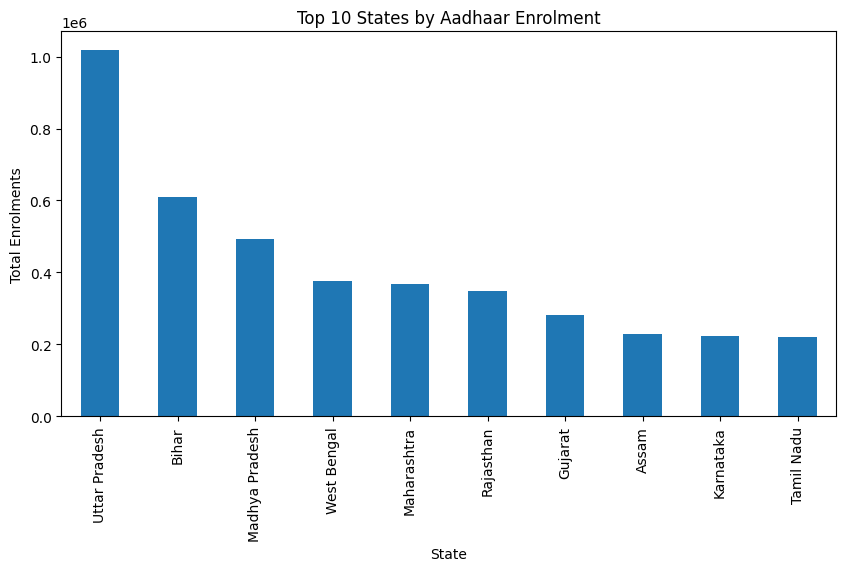

In [14]:
state_enrol = enrol.groupby("state")["total_enrolments"].sum()

state_enrol.sort_values(ascending=False).head(10).plot(kind="bar")
plt.title("Top 10 States by Aadhaar Enrolment")
plt.xlabel("State")
plt.ylabel("Total Enrolments")
plt.show()

**Insight:**  
A small number of states contribute a large share of total Aadhaar enrolments, likely reflecting population size and enrolment infrastructure.




---



## Age-wise Aadhaar Enrolment Distribution

This analysis shows enrolment patterns across different age groups to understand demographic coverage.


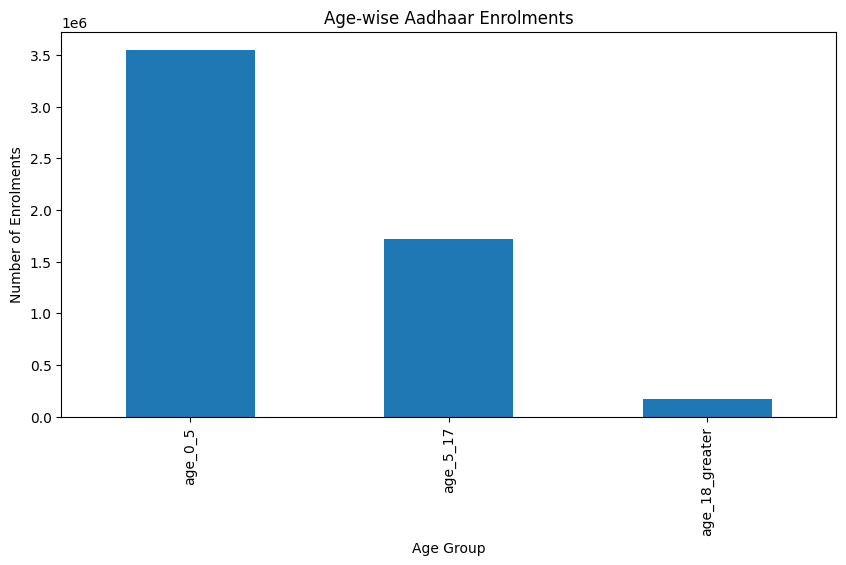

In [15]:
age_totals = enrol[["age_0_5", "age_5_17", "age_18_greater"]].sum()

age_totals.plot(kind="bar")
plt.title("Age-wise Aadhaar Enrolments")
plt.xlabel("Age Group")
plt.ylabel("Number of Enrolments")
plt.show()

**Insight:**  
Enrolments are highest in the 0–5 age group, indicating strong early-age Aadhaar registration, while adult enrolments are comparatively lower.




---



## Monthly Aadhaar Enrolment Trend

This section analyzes how Aadhaar enrolment activity changes over time on a monthly basis.


/tmp/ipython-input-1732611891.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  enrol["date"] = pd.to_datetime(enrol["date"])


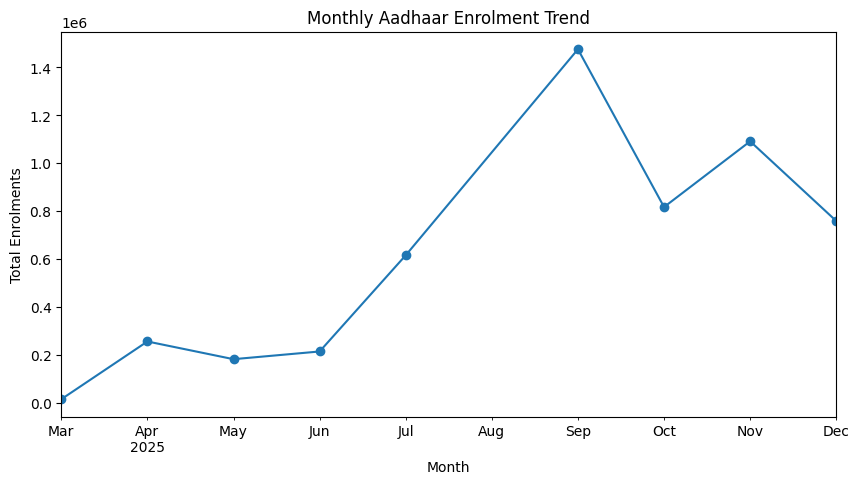

In [16]:
# Convert date column to datetime
enrol["date"] = pd.to_datetime(enrol["date"])

# Extract month
enrol["month"] = enrol["date"].dt.to_period("M")

monthly_enrol = enrol.groupby("month")["total_enrolments"].sum()

monthly_enrol.plot(kind="line", marker="o")
plt.title("Monthly Aadhaar Enrolment Trend")
plt.xlabel("Month")
plt.ylabel("Total Enrolments")
plt.show()

**Insight:**  
Monthly enrolment levels fluctuate significantly, suggesting possible seasonal effects or changes in enrolment drive intensity.




---



## Summary of Findings

- Aadhaar enrolment is concentrated in younger age groups, especially children below five years.
- Enrolment activity varies across months, indicating non-uniform operational patterns.
- A limited number of states account for a significant proportion of total enrolments.

These insights highlight the importance of age-focused and region-specific enrolment strategies.




---



## Limitations

This analysis is based on available anonymized enrolment data.  
Population size, regional policies, and external factors are not considered and may influence the observed patterns.
